### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
# Importing plot libs
import seaborn as sns
import matplotlib.pyplot as plt

import re
import math

In [2]:
sns.set_style('darkgrid')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
pal = sns.color_palette('rainbow')
pal.as_hex()

['#386df9', '#12c8e6', '#5af8c8', '#a4f89f', '#ecc86f', '#ff6d38']

In [3]:
str(pal.as_hex())

"['#386df9', '#12c8e6', '#5af8c8', '#a4f89f', '#ecc86f', '#ff6d38']"

### Reading Dataset

In [4]:
df = pd.read_csv('apple_sales_2024.csv')

### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            1000 non-null   object 
 1   Region                           1000 non-null   object 
 2   iPhone Sales (in million units)  1000 non-null   float64
 3   iPad Sales (in million units)    1000 non-null   float64
 4   Mac Sales (in million units)     1000 non-null   float64
 5   Wearables (in million units)     1000 non-null   float64
 6   Services Revenue (in billion $)  1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [6]:
df.shape

(1000, 7)

In [7]:
df.head()

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29


In [8]:
df.duplicated().sum()

0

In [9]:
(df
 .isna()
 .sum()
 .sort_values(ascending=False)
 .reset_index()
 .rename(columns = {'index' : "Column", 0 : "Missing"})
)

,Column,Missing
0,State,0
1,Region,0
2,iPhone Sales (in million units),0
3,iPad Sales (in million units),0
4,Mac Sales (in million units),0
5,Wearables (in million units),0
6,Services Revenue (in billion $),0


In [10]:
cols = df.columns
cols

Index(['State', 'Region', 'iPhone Sales (in million units)',
       'iPad Sales (in million units)', 'Mac Sales (in million units)',
       'Wearables (in million units)', 'Services Revenue (in billion $)'],
      dtype='object')

In [11]:
df['State'].value_counts()

State
Hong Kong       50
UK              47
South Africa    47
California      47
Canada          46
Brazil          46
Australia       43
Shenzhen        43
Beijing         43
France          43
Shanghai        43
Japan           40
Chongqing       40
Spain           39
Mexico          39
Italy           38
Indonesia       38
Germany         37
New York        37
Illinois        35
South Korea     34
India           33
Texas           33
Thailand        33
Florida         26
Name: count, dtype: int64

In [12]:
df['Region'].value_counts()

Region
Rest of World    221
Greater China    219
Europe           204
Rest of Asia     178
North America    178
Name: count, dtype: int64

### Statistical Analysis

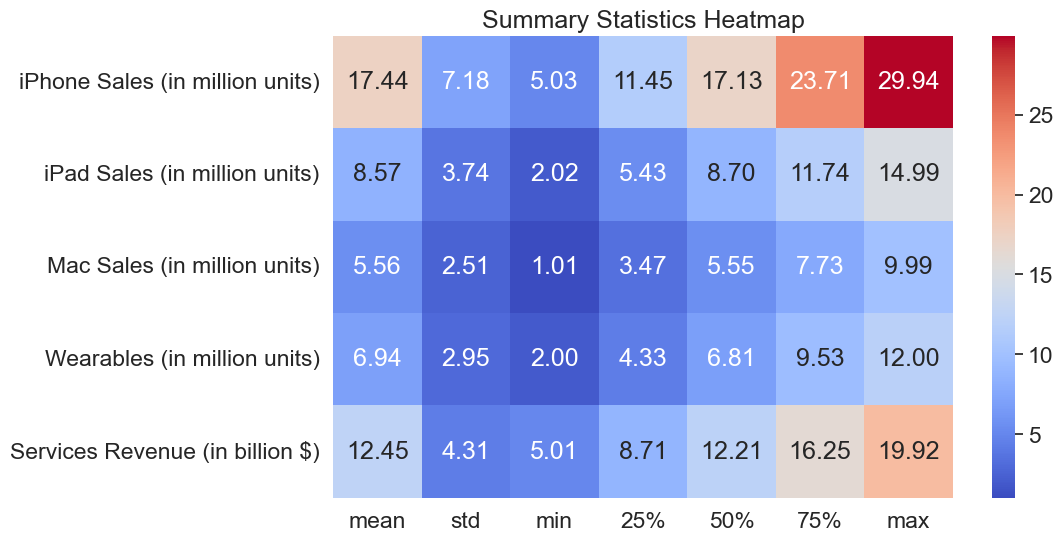

In [13]:
desc = df.describe().T
plt.figure(figsize=(10, 6))
sns.heatmap(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Summary Statistics Heatmap')
plt.show()

### Outlier Analysis

In [14]:
def detect_outliers(df):
    outliers = {}
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    num_columns = len(numeric_columns)
    n_rows = math.ceil(num_columns / 2)
    
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_columns):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers[col] = list(outlier_indices)

        axes[i].boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        axes[i].set_title(f"Boxplot for {col}")
        axes[i].set_xlabel(col)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    
    return outliers


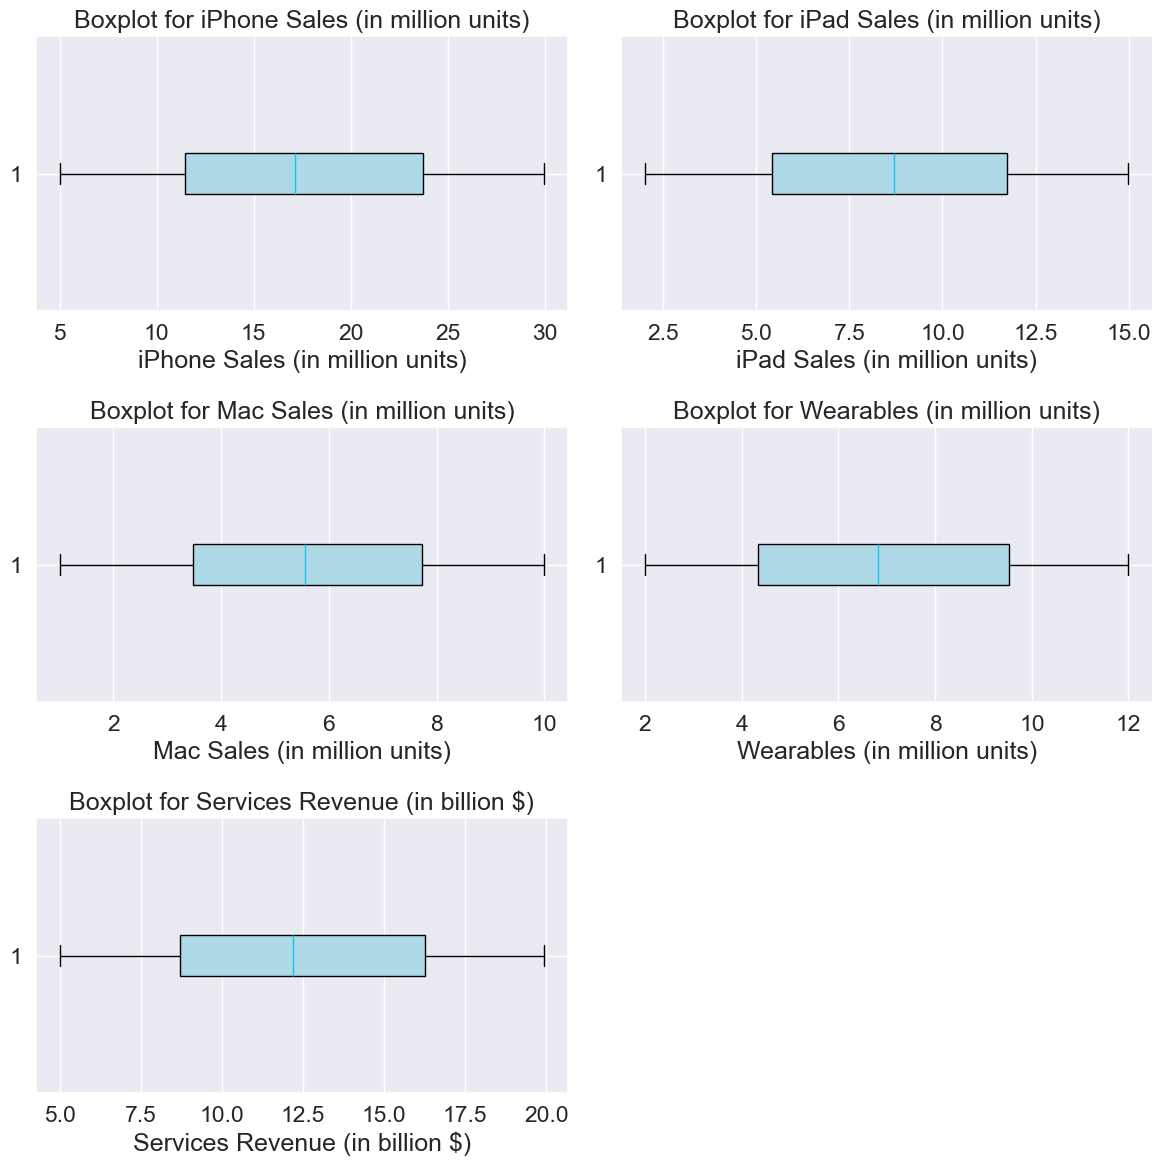

{'iPhone Sales (in million units)': [],
 'iPad Sales (in million units)': [],
 'Mac Sales (in million units)': [],
 'Wearables (in million units)': [],
 'Services Revenue (in billion $)': []}

In [15]:
outliers = detect_outliers(df)
outliers

In [16]:
df.to_csv("processed_apple_sales.csv", index=False, decimal=",", sep=";")